# Objective :  Most of the banks offers personal loans to their customers.Analyze the historical prior data to approve loans.

In [1]:
# loading required libraries 

In [2]:
import pandas as pd 
import seaborn as sb
data = pd.read_csv('Bank_loan_prediction.csv')
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y


In [3]:
# No of rows and columns 
data.shape

(614, 13)

In [ ]:
# There are 614 rows and 13 columns 

In [48]:
# getting dataset info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 62.5+ KB


In [50]:
# Basic details of dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.397394,341.607492,0.848534
std,6109.041673,2926.248369,84.037503,64.472947,0.358795
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [47]:
numeric_columns = list(data.select_dtypes(exclude='object').columns)
categorical_columns = list(data.select_dtypes(include='object').columns)
numeric_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [4]:
# Data Cleaning 
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
# Here we didn't find any null values in the data set and no duplicate columns. 

In [6]:
# Problem 1 : Display the count of male customers and female customers ? 

<Axes: xlabel='Gender', ylabel='count'>

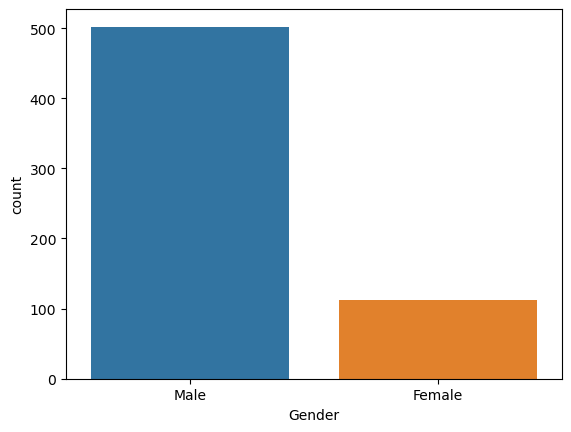

In [7]:
sb.countplot(data, x='Gender')

In [8]:
# There is a greater number of male customers

<Axes: xlabel='Married', ylabel='count'>

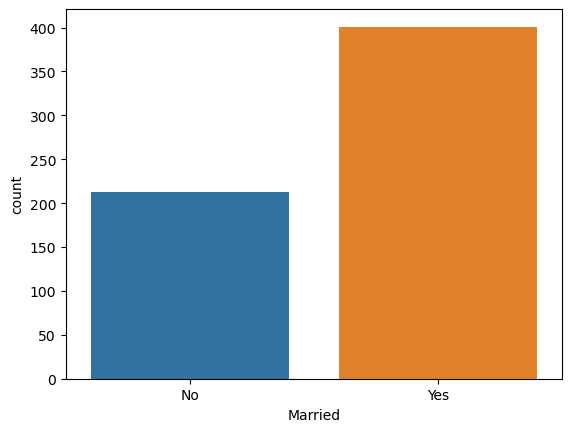

In [9]:
# problem 2 Display the count of married customers ?
sb.countplot(data , x='Married')

In [10]:
# There is a greater number of married customers.

<Axes: xlabel='Education', ylabel='count'>

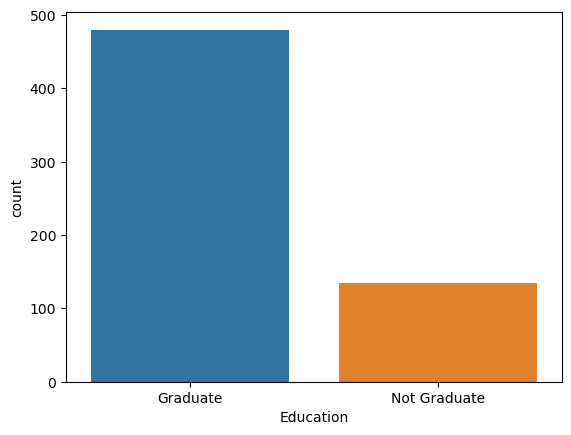

In [11]:
# problem 3 Display the education count ?
sb.countplot(data, x ="Education" )


In [12]:
# There are more number of graduates . 

<Axes: xlabel='Self_Employed', ylabel='count'>

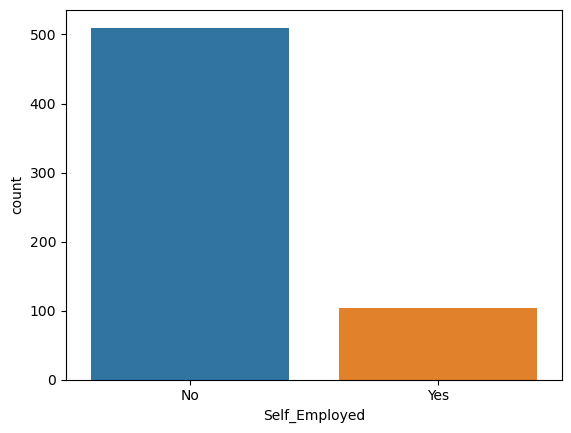

In [13]:
# problem 4 Display the employee count of the customers ? 
sb.countplot(data,x='Self_Employed')

<Axes: xlabel='Credit_History', ylabel='count'>

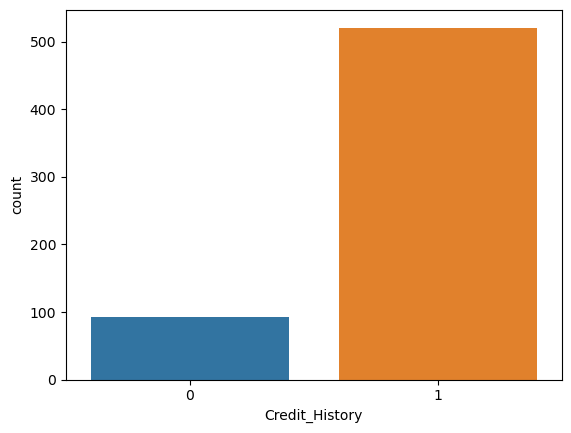

In [14]:
# problem 5 How many customers currently have a credit card history? 
sb.countplot(data ,x = 'Credit_History')

In [15]:
# There are more customers holding credit history always 

<Axes: xlabel='Property_Area', ylabel='count'>

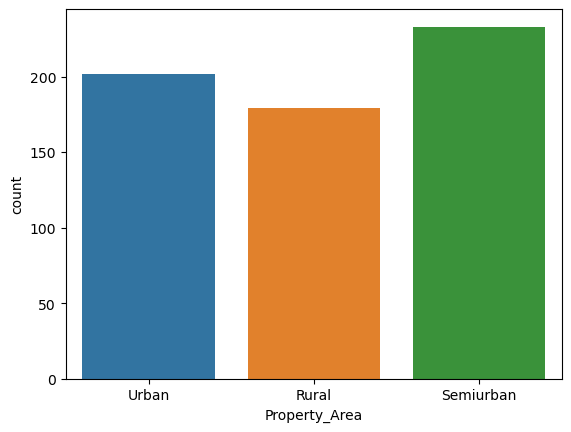

In [16]:
#Problem 6 find the customers count along with property area ?  
sb.countplot(data, x ='Property_Area')


In [17]:
# There are more numbers with customers from semiurban areas 

In [18]:
# level 2 Bivariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

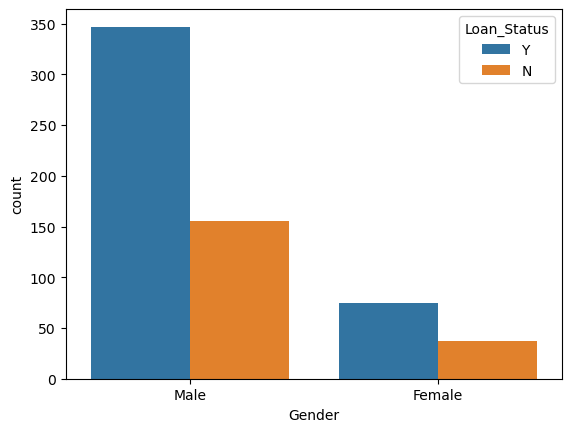

In [19]:
# Problem 7 Find out the gender with highest number of loans approval ? 
sb.countplot(data,x='Gender',hue='Loan_Status')


In [20]:
# The probability is more for males to get loans approval . 

<Axes: xlabel='Married', ylabel='count'>

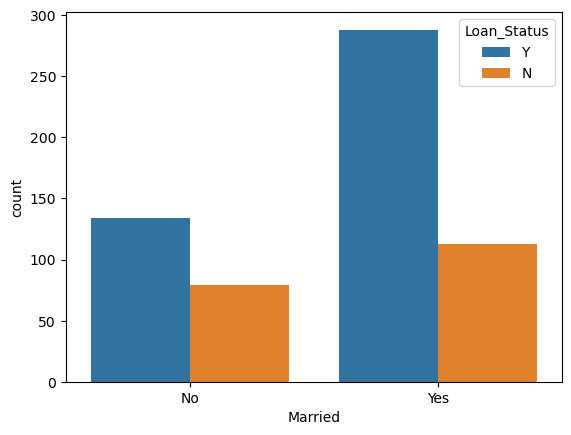

In [21]:
# problem 8 Find out the category of loans that are approved based on marital status ? 
sb.countplot(data,x='Married',hue = 'Loan_Status')

In [22]:
# Married people have a higher chance of loan approval.

<Axes: xlabel='Education', ylabel='count'>

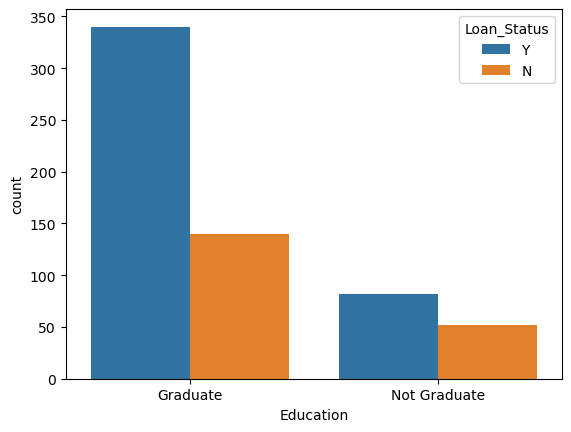

In [23]:
# Problem 9 Find out the Education status for getting loans ? 
sb.countplot(data,x='Education',hue='Loan_Status')

In [24]:
# Graduates have a higher likelihood of loans approval . 

<Axes: xlabel='Self_Employed', ylabel='count'>

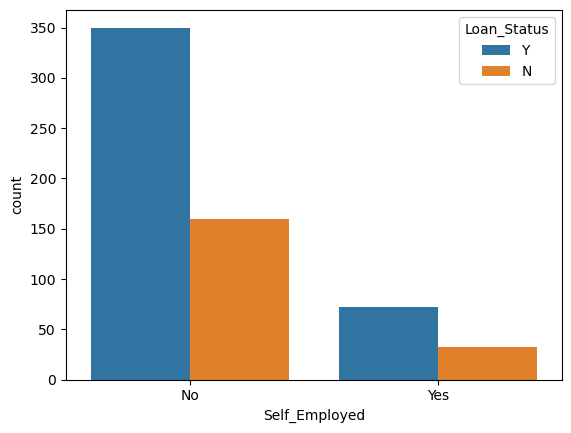

In [25]:
# Problem 10 Find out who are getting loans approved based on employment ? 
sb.countplot(data,x='Self_Employed',hue ='Loan_Status')

In [26]:
# The customers rather being self employed are getting easy loans approval 

<Axes: xlabel='Credit_History', ylabel='count'>

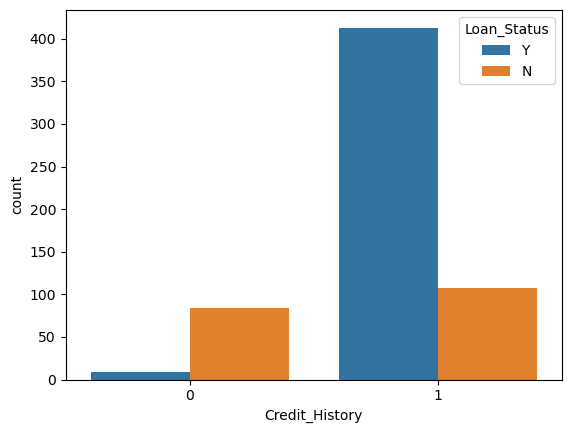

In [27]:
# Problem 11 Find out the count of customers getting loans based on their previous card history?
sb.countplot(data, x = 'Credit_History',hue ='Loan_Status')

In [28]:
# Previous credit card holders have a higher chance of loan approval.

<Axes: xlabel='Property_Area', ylabel='count'>

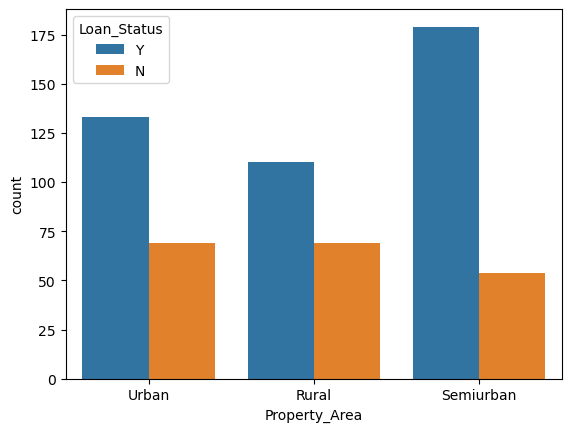

In [29]:
# Problem 12 Find out the count of customers for easy loan approval based on property area ?
sb.countplot(data,x='Property_Area',hue = 'Loan_Status')

In [30]:
# The customers who are having properties in semi urban areas are aproving loans easily . 

In [31]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
import matplotlib.pyplot as plt


In [33]:
avg_income = data.groupby(['Property_Area','Loan_Status','Education'])['ApplicantIncome','LoanAmount'].min()
avg_income

C:\Users\kolla\AppData\Local\Temp\ipykernel_39692\1042306319.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_income = data.groupby(['Property_Area','Loan_Status','Education'])['ApplicantIncome','LoanAmount'].min()


ApplicantIncome  LoanAmount
Property_Area Loan_Status Education                                
Rural         N           Graduate                  150          46
                          Not Graduate             2281          65
              Y           Graduate                  645          40
                          Not Graduate             1820          48
Semiurban     N           Graduate                 1500          63
                          Not Graduate             1668          62
              Y           Graduate                 1759          25
                          Not Graduate              210          25
Urban         N           Graduate                  416           9
                          Not Graduate             1442          35
              Y           Graduate                 1299          17
                          Not Graduate             1907          60

In [34]:
# The minimum applicant income for approval of loans for semi urban region with graduation is 1759 $ 

In [35]:
# Problem 13 Do we have any relationship between loan amount and applicant income ? 
data['LoanAmount'].corr(data['ApplicantIncome'])

0.5656208762559632

In [36]:
# The 0.565 co-relation value represents moderate positive relation. It means that as the applicant income increases 
# The loan amount also slightly increases . 

In [42]:
# Problem 14 find out the count of customers with existing credit card , having properties in Semi urban area and  approval of loan ? 
df = data[(data['Credit_History']==1) & (data['Loan_Status'] =='Y') & (data['Property_Area'] =='Semiurban')]
df.shape

(175, 13)

In [ ]:
# There are 175 customers with previous credit card , properties in semi urban areas with loans approval .  

# Conclusion: Married males with no self-employment, graduates, with previous credit cards, and properties in semi-urban areas, with a minimum income of 1759, are getting loans